# Péndulo rígido ideal
Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza  
© 2020 
---

## Enunciado
Escriba y resuelva la ecuación que describe la dinámica de un péndulo de longitud $l$ en presencia de un campo gravitatorio de constante $g$. Discuta todas las aproximaciones que realiza.

## Resolución
Para la partícula de interés hay que plantear la 2.a ley de Newton para la coordenada de interés en torno de su punto de equilibrio. Para esto tenemos dos alternativas:
- Determinar el punto de equilibrio en que $\sum \vec{F}=0$ y escribir la descomposición de las $\vec{F}$ en la dirección de la mencionada coordenada.
- Escribir el potencial, encontrar su mínimo en función de la coordenada y desarrollarlo en serie en torno al mismo. Luego basta usar $\vec{F}= - \vec{\nabla} V$

El 2.o enfoque puede parecer tedioso a primera vista, pero es muy práctico cuando el sistema se torna complejo. Obviamente para estos primeros ejercicios puede parecer impráctico, pero es necesario entrenarse en esta metodología para enfrentarse a lo que viene luego en la materia.

### Dibujo
Es buena idea que empecemos por hacer un dibujo del sistema que queremos estudiar.
Además de los "datos" $g,l$ debemos suponer que del péndulo alguna masa $m$ cuelga.
En el dibujo indíco dos posibles coordenadas que podriamos usar para analizar al apartamiento de la posicíon vertical (de equilibrio): el ángulo $\varphi$, o el apartamiento horizontal $\psi$.

![](pénduloHorizontal.png "Péndulo ideal.")

### Aproximaciones
- La cuerda es rígida (no se curva) e inextensible $\implies$ la posición de la masa es $\vec{r}= l \hat{r}$. 
- El movimiento siempre es en un plano: $\hat{r}, \hat{\varphi}$


### Desarrollo a partir del potencial
Considero que el potencial $V$ es nulo en el origen de coordenadas, es decir que donde se encuentra su mínimo $\varphi=0, V(\varphi=0)= -mgl$ y por tanto

$$V(\varphi)= m g l \left( - \cos{\varphi} \right).$$

Es claro que $\varphi=0$ es la posición de equilibrio, así que desarrollo $V$ en torno de este
$$V(\varphi)= - m g l \left( \cos(0) - \sin(0) \varphi - \frac{\cos(0)}{2} \varphi^2 \right) = mgl (\frac{\varphi^2}{2} - 1).$$

Comparemos la $V$ original y su aproximación.

In [2]:
# Primero importamos las bibliotecas de Python que vamos a usar
import numpy as np # numpy, de cálculo numérico, para vectores y matrices
import matplotlib.pyplot as plt # matplotlib para graficar

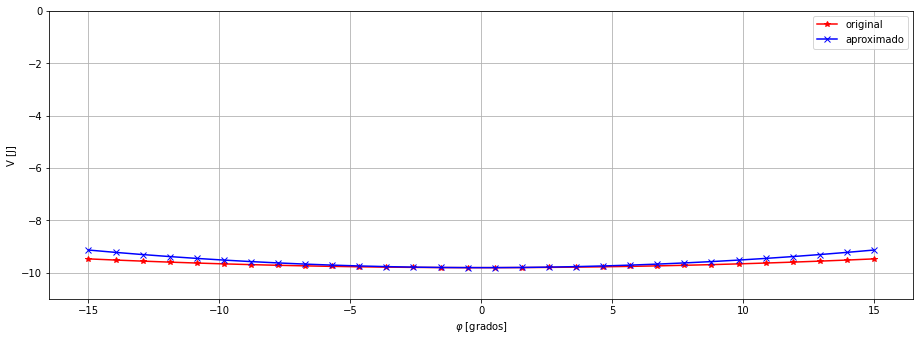

In [21]:
phis = np.arange(-15,16)
# phis= np.linspace(-15, 15, 31) # phi de a un grado desde -15 hasta 15 grados
m = 1 # [kg]
g = 9.81 # [m s^-2]
l = 1 # [m]
v_original = m* g* l* (-np.cos(phis* np.pi/ 180))
v_aproximado = m* g* l* ((phis * np.pi/ 180)**2- 1)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0,0,1,1])
ax.plot(phis, v_original, '*-r', label='original')
ax.plot(phis, v_aproximado, 'x-b', label= 'aproximado')
ax.legend() # muestra las etiquetas (labels)
ax.set_xlabel(r'$\varphi$ [grados]')
ax.set_ylabel('V [J]')
ax.set_ylim([-11,0])
ax.grid()

Como vemos la aproximación funciona bastante bien.
Conformes con ella calculamos la fuerza
$$
\vec{F} = - \vec{\nabla}V = - \left( \partial_r, \frac{1}{r} \partial_\varphi, \partial_z \right) V(\varphi)
$$
[Acá hago abuso de notación para escribir menos: $\partial_x = \frac{\partial}{\partial x}$]

Pero solo nos interesa aplicar la 2.a ley para lo que pasa en $\hat{\varphi}$

$$
m \ddot{\vec{r}} \cdot \hat{\varphi} = -\frac{1}{r} \partial_\varphi V(\varphi)
$$

Como la aceleración en cílindricas es $\ddot{\vec{r}}= (\ddot r - r \dot{\varphi}^2) \hat{r} + (\dot{r} \dot{\varphi}^2 + r \ddot{\varphi}) \hat{\varphi} + \ddot{z} \hat{z}$ y el péndulo es rígido e inextensible $r \equiv l$

$$
\begin{aligned}
m l \ddot{\varphi} &= - \frac{1}{l} m g l \varphi \\
\ddot{\varphi} &= - \frac{g}{l} \varphi
\end{aligned}
$$
Y arribamos a una ecuación diferencial que debemos resolver.

## Resolución de la ecuación diferencial
Voy a repasar todos los pasos para esta resolución, que de ahora en más podrán obviarse en otros problemas, pero es bueno haberlo revisto en su totalidad.

### La frecuencia de oscilación
Proponemos una solución $\varphi= \mathrm{e}^{at}$ que al aplicarla a la ecuación anterior

$$
\begin{aligned}
a^2 \mathrm{e}^{at} &= - \frac{g}{l} \mathrm{e}^{at} \\
a^2 &= -\frac{g}{l} \\
a &= \pm \sqrt{\frac{g}{l}} \imath
\end{aligned}
$$
Entonces la ecuación tiene por solución la combinación lineal de las dos correspondientes soluciones ($\pm$)

$$
\varphi(t)= A_1 \mathrm{e}^{\imath \sqrt{\frac{g}{l}} t}+ A_2 \mathrm{e}^{-\imath \sqrt{\frac{g}{l}} t}
$$
Estas exponenciales son períodicas en $\sqrt{\frac{g}{l}}$ así que

$$
\boxed{
    \omega= \sqrt{\frac{g}{l}}
},
$$
es la frecuencia angular.

### Encontrando una solución real
No queremos un $\varphi$ complejo, sino uno real. Así que aplicamos el truco de sumar a la solución anterior su adjunta $\bar{\varphi}(t)$.
El obtener la adjunta es hacer dos cosas:
- conjugar los números complejos: cambiar el signo de sus argumentos, y
- transponer: en el caso más general los $A_n$ son vectores, no es el caso del péndulo, en que $A_n$ son solo un número.

$$
\begin{aligned}
\Re{[\varphi(t)]} &= \frac{1}{2} \left[ \varphi(t) + \varphi^*(t) \right]  \\
& = \frac{1}{2} \left[ A_1 \mathrm{e}^{\imath \omega t}+ A_2 \mathrm{e}^{-\imath \omega t} 
+
A_1^* \mathrm{e}^{-\imath \omega t}+ A_2^* \mathrm{e}^{\imath \omega t}
  \right] \\
  & = \frac{1}{2} \left[ (A_1+ A_2^*) \mathrm{e}^{\imath \omega t}+ (A_1^*+ A_2) \mathrm{e}^{-\imath \omega t} 
  \right] 
  = \frac{1}{2} (A_1+ A_2^*) \mathrm{e}^{\imath \omega t}+ \text{complejo conjugado},
\end{aligned}
$$
donde $A_n^*$ indica el complejo conjugado de $A_n$.

Lo que acompaña la exponencial $\frac{1}{2} (A_1+ A_2^*)$ es un número complejo $B \mathrm{e}^{\imath \phi_0}$, asi podemos escribir nuestra solución real

$$
\begin{aligned}
\varphi(t) &= B \mathrm{e}^{\imath (\omega t+ \phi_0)} + B \mathrm{e}^{- \imath (\omega t+ \phi_0)} \\
&= B \left[ \cos{\left( \omega t+ \phi_0 \right) } + \sin{\left( \omega t+ \phi_0 \right) } \right] + B \left[ \cos{\left( \omega t+ \phi_0 \right) } - \sin{\left( \omega t+ \phi_0 \right) } \right] \\
&= 2 B \cos{\left( \omega t+ \phi_0 \right) } = A \cos{\left( \omega t+ \phi_0 \right) } \quad (2B =A)
\end{aligned},
$$
arribandose asía a la buscada ecuación de movimiento

$$
\boxed{ \varphi(t) = A \cos{\left( \omega t+ \phi_0 \right) } }.
$$

Pero como toda resolución de una ecuación diferencial requiere de conocer las condiciones en algún $t$ de referencia para determinar una amplitud máxmima de la oscilación $A$, y una fase inicial de la misma $\phi_0$ (que tan alejada se encuentra la situación inicial de la máxima amplitud).

### Condiciones iniciales
En el problema del péndulo obtuvimos una solución que había que especializar en función de condiciones iniciales de amplitud máxima $A$ y de una un tanto "esotérica" fase inicial $\phi_0$, que para este problema sería
$$
  \varphi(t) = A \cos{\left( \omega t + \phi_0 \right)}.
$$

Antes de llegar a esta versión compacta habriamos pasado por
$$
\varphi(t)= A_1 \mathrm{e}^{\imath \omega t}+ A_2 \mathrm{e}^{-\imath \omega t},
$$
pero aquí voy a ahorrar tiempo y utilizar las relaciones de Euler $\mathrm{e}^{\pm \imath \theta}= \cos{\theta}+ \imath \sin{\theta}$ para escribir
$$
\varphi(t)= (A_1+ A_2) \cos{(\omega t)} +  \imath (A_1- A_2) \sin{(\omega t)}.
$$
Esta expresión es muy práctica pues si especializamos esta solución en $t=0$ solo queda $(A_1+ A_2)$, por lo que esto es $\varphi(0)$. De igual laa derivada de tal solución en $t=0$ es $\imath \omega (A_1 - A_2)$ y corresponderá esto a $\dot{\varphi}(0)$.
Así pues
$$
\begin{aligned}
  \varphi(0) &= (A_1 + A_2)\\
  \dot{\varphi}(0) &= \imath \omega (A_1 - A_2),
\end{aligned}
$$
lo que permite escribir una solucíon en función de condiciones iniciales observables:
$$
\boxed{
  \varphi(t)= \varphi(0) \cos{(\omega t)} +  \frac{\dot{\varphi}(0)}{\omega} \sin{(\omega t)}.
}
$$

## Graficación de la dinámica

In [1]:
# función con la solución de la dinámica
def phi(t):
    return phi_0* np.cos(omega* t) + (phi_punto_0/ omega)* np.sin(omega* t)

# condiciones iniciales péndulo
g= 9.81 # [m s^-2]
l = 1 #  [m] longitud de la cuerda
omega = np.sqrt(g/l) # frecuencia de oscilación
phi_0 = 10 # [⁰] amplitud inicial en grados
phi_0 *= np.pi/ 180 # [radianes] grados -> radianes
phi_punto_0 = 0 # [radianes s^-1] velocidad inicial

# graficación péndulo
tiempos = np.linspace(0,10,100)

fig= plt.figure(figsize=(12, 4))
ax= fig.add_axes([0,0,1,1])
ax.plot(tiempos, phi(tiempos), '.-' )
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel(r'$\varphi$ [rad]')
ax.grid()

NameError: name 'np' is not defined